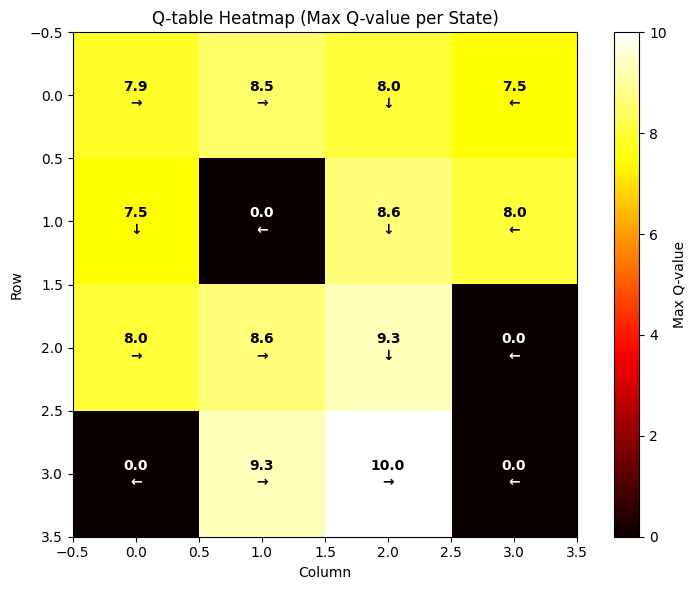

In [ ]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# LOAD MODEL HERE
with open("pkls/100ep/reze.pkl", "rb") as f:
    q = pickle.load(f)

# Get max Q-value for each state
max_q = np.max(q, axis=1)

# Reshape to grid (assuming 4x4 grid)
grid_size = 4
q_grid = max_q.reshape(grid_size, grid_size)

plt.figure(figsize=(8, 6))
plt.imshow(q_grid, cmap='hot', interpolation='nearest')
plt.colorbar(label='Max Q-value')
plt.title('Q-table Heatmap (Max Q-value per State)')
plt.xlabel('Column')
plt.ylabel('Row')

# Add text annotations with adaptive color
for i in range(grid_size):
    for j in range(grid_size):
        state = i * grid_size + j
        best_action = np.argmax(q[state])
        actions = ['←', '↓', '→', '↑']
        
        # Use black text for bright cells, white for dark cells
        text_color = 'black' if q_grid[i, j] > q_grid.max() * 0.5 else 'white'
        
        plt.text(j, i, f'{q_grid[i,j]:.1f}\n{actions[best_action]}', 
                ha='center', va='center', color=text_color, fontweight='bold')

plt.tight_layout()

# SAVE MODEL HERE
plt.savefig('pkls/100ep/q_table_heatmap.png')
plt.show()